# Lab | Imbalanced data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# Load the dataset and explore the variables.

In [3]:
customer=pd.read_csv('files_for_lab/customer_churn.csv')
customer.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
list(customer.columns.values)

['customerID',
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges',
 'Churn']

# Predicting variable Churn 

- Using a logistic regression on variables tenure, SeniorCitizen,MonthlyCharges.
- We will try to predict variable Churn using a logistic regression on variables tenure, SeniorCitizen,MonthlyCharges.
- Split the Dataset into X ('tenure', 'SeniorCitizen', 'MonthlyCharges') and y ('Churn')
- Build the logistic regression model.
- Evaluate the model.
- Even a simple model will give us more than 70% accuracy. Why?

In [22]:
customer['Churn'].replace({'Yes': 1, 'No': 0}, inplace=True)

In [25]:
X = customer[['tenure', 'SeniorCitizen', 'MonthlyCharges']]
y = customer[['Churn']]

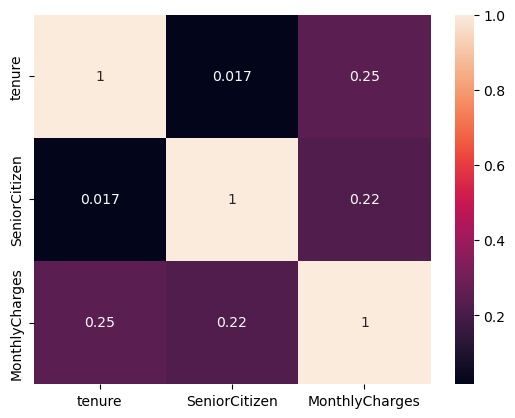

In [26]:
correlations_matrix = X.corr()
sns.heatmap(correlations_matrix, annot=True)
plt.show()

In [51]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [52]:
transformer = StandardScaler().fit(X_train)
X_train_scaled = pd.DataFrame(transformer.transform(X_train),columns=X.columns)
X_train_scaled.head()

,tenure,SeniorCitizen,MonthlyCharges
0,0.088574,-0.437321,-1.470758
1,1.026635,-0.437321,1.378275
2,0.945065,-0.437321,-0.662923
3,-0.971843,-0.437321,-1.490705
4,1.312132,-0.437321,0.882935


In [53]:
transformer = StandardScaler().fit(X_test)
X_test_scaled = pd.DataFrame(transformer.transform(X_test),columns=X.columns)
X_test_scaled.head()

,tenure,SeniorCitizen,MonthlyCharges
0,-1.177726,-0.447671,-0.600465
1,-1.055892,-0.447671,-1.465913
2,-1.218337,-0.447671,-1.489169
3,-0.852836,-0.447671,0.314818
4,-1.137114,-0.447671,0.927774


In [54]:
y_train.head()

,Churn
1432,0
4991,1
4029,0
3084,0
2566,0


In [55]:
y_train = y_train.reset_index(drop=True)

y_test = y_test.reset_index(drop=True)

In [56]:
y_train.head()

,Churn
0,0
1,1
2,0
3,0
4,0


In [57]:
y_test.head()

,Churn
0,1
1,0
2,0
3,0
4,0


In [58]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression(solver='lbfgs')
LR.fit(X_train_scaled, y_train)

C:\Users\zaras\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [59]:
LR.predict_proba(X_train_scaled)

array([[0.95804092, 0.04195908],
       [0.83898972, 0.16101028],
       [0.97060471, 0.02939529],
       ...,
       [0.8574779 , 0.1425221 ],
       [0.9447306 , 0.0552694 ],
       [0.39780702, 0.60219298]])

In [60]:
logits = np.log(1/LR.predict_proba(X_train_scaled)[:,1]-1)

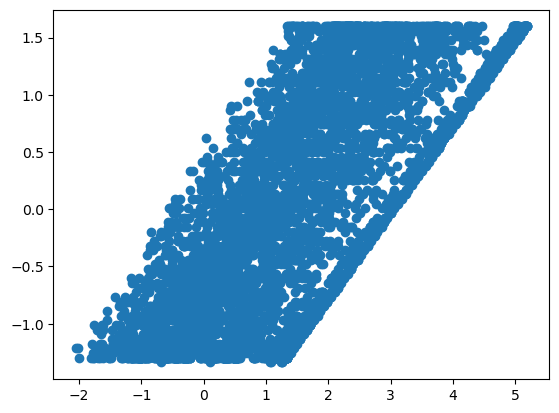

In [61]:
plt.scatter(logits,X_train_scaled['tenure'])

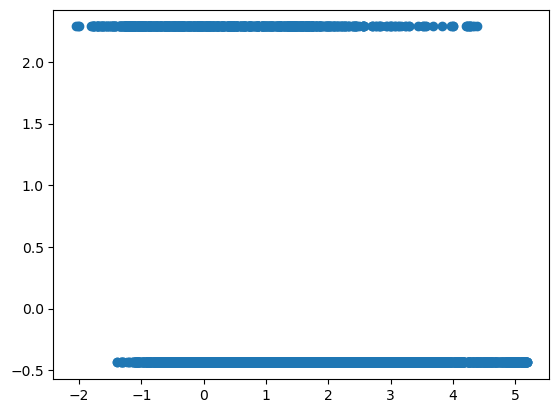

In [62]:
plt.scatter(logits,X_train_scaled['SeniorCitizen'])

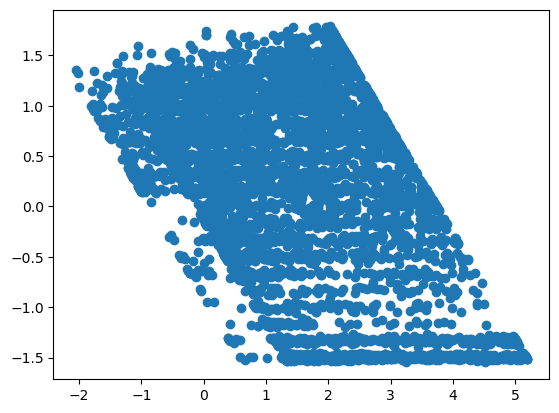

In [63]:
plt.scatter(logits,X_train_scaled['MonthlyCharges'])

<Axes: xlabel='Churn'>

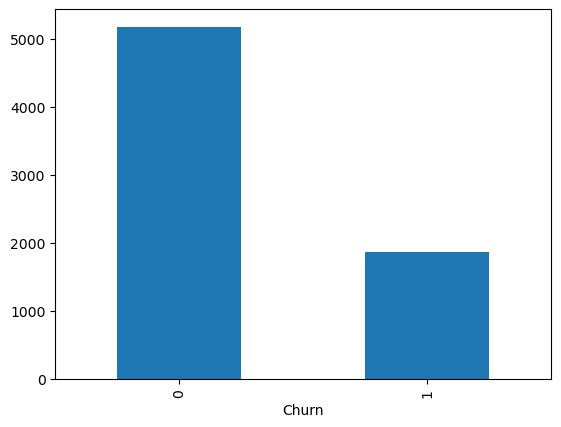

In [64]:
count_classes = customer['Churn'].value_counts()
count_classes
count_classes.plot(kind = 'bar')

In [65]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression(solver='lbfgs')
LR.fit(X_train_scaled, y_train)
LR.score(X_test_scaled, y_test)

C:\Users\zaras\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.7717206132879046

In [ ]:
#undersample - for millions of rows otherwise oversample

In [66]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

pred = LR.predict(X_test_scaled)

print("precision: ",precision_score(y_test,pred))
print("recall: ",recall_score(y_test,pred))
print("f1: ",f1_score(y_test,pred))

precision:  0.6374622356495468
recall:  0.4279918864097363
f1:  0.5121359223300971


In [67]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,pred)

array([[1148,  120],
       [ 282,  211]], dtype=int64)

In [ ]:
# finding by definition
# accuracy = TP+TN / all
#precision = TP / (TP+FP)
#recall = TP / (TP+FN)
#f1_scores = 2*(precision * recall)/(precision+recall)

# TN FP
# FN TP

In [69]:
# 282 was a false negative because of the imbalanced target values as many were '0' or 'No'. We fail to identify 42% of customer churn!

# Synthetic Minority Oversampling TEchnique (SMOTE)

- It is an over sampling technique based on nearest neighbors that adds new points between existing points. 
- Apply imblearn.over_sampling.SMOTE to the dataset. Build and evaluate the logistic regression model. 
- Is it there any improvement?

In [83]:
from sklearn.utils import resample

In [84]:
# oversampling / undersampling is only to be done on the TRAINING set
# our test set still must reflect reality!
train = pd.concat([X_train_scaled, y_train],axis=1)
train.head()

,tenure,SeniorCitizen,MonthlyCharges,Churn
0,0.088574,-0.437321,-1.470758,0
1,1.026635,-0.437321,1.378275,1
2,0.945065,-0.437321,-0.662923,0
3,-0.971843,-0.437321,-1.490705,0
4,1.312132,-0.437321,0.882935,0


In [85]:
# separate majority/minority classes
no_churn = train[train['Churn']==0]
yes_churn = train[train['Churn']==1]

In [88]:
display(no_churn.shape)
display(yes_churn.shape)

(3906, 4)

(1376, 4)

In [97]:
# oversample minority
yes_churn_oversampled = resample(yes_churn, #<- sample from here
                                    replace=True, #<- we need replacement, since we don't have enough data otherwise
                                    n_samples = len(no_churn),#<- make both sets the same size
                                    random_state=0)

In [101]:
# both sets are now of a reasonable size
display(no_churn.shape)

(3906, 4)

In [102]:
display(yes_churn_oversampled.shape)

(3906, 4)

In [106]:
yes_churn_oversampled.head()

,tenure,SeniorCitizen,MonthlyCharges,Churn
2585,-1.216555,-0.437321,-0.327156,1
2156,0.251715,-0.437321,1.015912,1
4632,-0.767917,-0.437321,0.015260,1
3125,-1.012628,2.286651,1.346693,1
2898,-0.441634,-0.437321,0.641914,1


In [107]:
train_oversampled = pd.concat([no_churn,yes_churn_oversampled],axis=0)
train_oversampled.head()

,tenure,SeniorCitizen,MonthlyCharges,Churn
0,0.088574,-0.437321,-1.470758,0
2,0.945065,-0.437321,-0.662923,0
3,-0.971843,-0.437321,-1.490705,0
4,1.312132,-0.437321,0.882935,0
5,1.393703,-0.437321,-0.149299,0


In [109]:
y_train_over = train_oversampled['Churn']
X_train_over = train_oversampled.drop('Churn',axis = 1)

In [110]:
LR_over = LogisticRegression(solver='lbfgs')
LR_over.fit(X_train_over, y_train_over)
pred = LR_over.predict(X_test_scaled)

print("precision: ",precision_score(y_test,pred))
print("recall: ",recall_score(y_test,pred))
print("f1: ",f1_score(y_test,pred))

precision:  0.49591280653950953
recall:  0.7383367139959433
f1:  0.593317033414833


In [111]:
confusion_matrix(y_test,pred)

array([[898, 370],
       [129, 364]], dtype=int64)